## FML 01
***

### Monte-Carlo Simulation

**Theorem:** If $F(x)$ is a CDF with inverse function $F^{-1}(u)=inf\{x: F(x) \geq u\}$ and $U \sim \text{U}(0, 1)$, then $X = F^{-1}(U)$ is a random variable with CDF $F$.

This leads us to the inverse transform algorithm.

**Inverse Transform Algorithm:** 
1. Generate $U \sim \text{U}(0, 1)$
2. Return $X = F^{-1}$
    
Following the algorithm:
1. Calculate the CDF for $Y = 0$ and $Y = 1$, $\forall x \in [0, 1]$ 
$$
F(x) = \text{CDF} = 
\begin{cases}
    \int^x_0 2-2y \text{ d}y & \text{if } p(x|Y=0) \\
    \int^x_0 2y \text{ d}y & \text{if } p(x|Y=1) 
\end{cases} = 
\begin{cases}
    2x-x^2 & \text{if } p(x|Y=0) \\
    x^2 & \text{if } p(x|Y=1) 
\end{cases}
$$
2. Compute the inverse of the CDF's:
$$
F^{-1}(x) = 
\begin{cases}
    1-\sqrt{1-x} & \text{if } p(x|Y=0) \quad \forall x \in [0,1]\\
    \sqrt{x} & \text{if } p(x|Y=1) \quad \forall x \in [0,1]
\end{cases}
$$

In [1]:
from utils import create_data
from classifiers import (error_threshold_classifier, error_nn_classifier)
from viz import (plot_data, plot_cdf, plot_error_rate_stats)

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

%load_ext autoreload
%autoreload 2

### Data creation & Visualization

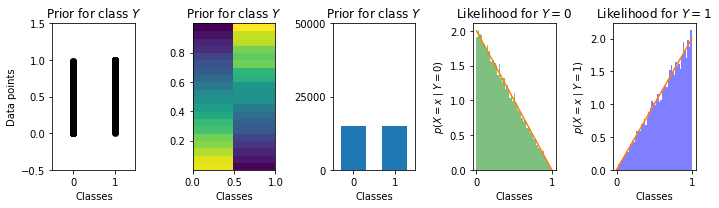

In [2]:
# Generation of the data
data = create_data(30000)
x_0 = data[data[:, 1] == 0][:, 0]
x_1 = data[data[:, 1] == 1][:, 0]
# Visualization of the data
plot_data(data)

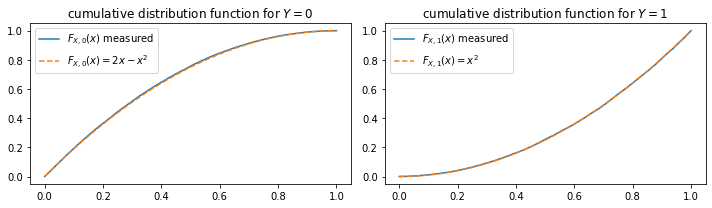

In [3]:
# CDF for both classes
plot_cdf(x_0, x_1)

### Threshold classifier

In [4]:
thresholds = [0.2, 0.5, 0.6]
batch_sizes = [10, 100, 1000, 10000]

classifier_A = []
classifier_B = []

In [5]:
for threshold in thresholds:
    for batch in batch_sizes:
        error_rates_A = error_threshold_classifier(type='A', batch=batch, n_data_sets = 10, threshold=threshold)
        
        classifier_A.append({"$x_0$": threshold,
                             "Batch size": batch,
                             "Mean": error_rates_A.mean(),
                             "Std": error_rates_A.std()
                            })
        
        error_rates_B = error_threshold_classifier(type='B', batch=batch, n_data_sets = 10, threshold=threshold)
        
        classifier_B.append({"$x_0$": threshold, 
                             "Batch size": batch, 
                             "Mean": error_rates_B.mean(), 
                             "Std": error_rates_B.std()
                            })

In [6]:
df_A = pd.DataFrame(classifier_A)
df_A = df_A.groupby(["$x_0$", "Batch size"]).first().unstack()
df_A

Mean                     Std                  
Batch size 10    100   1000  10000 10    100   1000  10000
$x_0$                                                     
0.20       35.00 36.00 33.93 33.86 16.88  4.49  1.21  0.48
0.50       26.00 23.70 25.07 24.96  8.00  4.10  1.18  0.36
0.60       23.00 27.20 25.41 26.09 14.87  3.40  1.17  0.45

In [7]:
df_B = pd.DataFrame(classifier_B)
df_B = df_B.groupby(["$x_0$", "Batch size"]).first().unstack()
df_B

Mean                     Std                  
Batch size 10    100   1000  10000 10    100   1000  10000
$x_0$                                                     
0.20       69.00 65.60 65.43 65.94  9.43  5.30  1.20  0.30
0.50       76.00 75.30 74.94 74.82 12.81  4.12  1.62  0.37
0.60       73.00 75.50 74.18 74.18 13.45  3.20  1.61  0.44

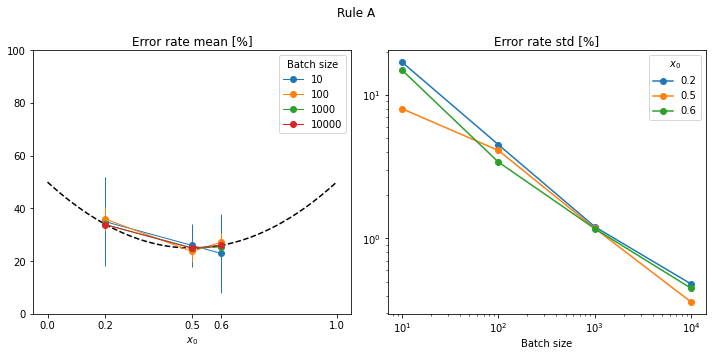

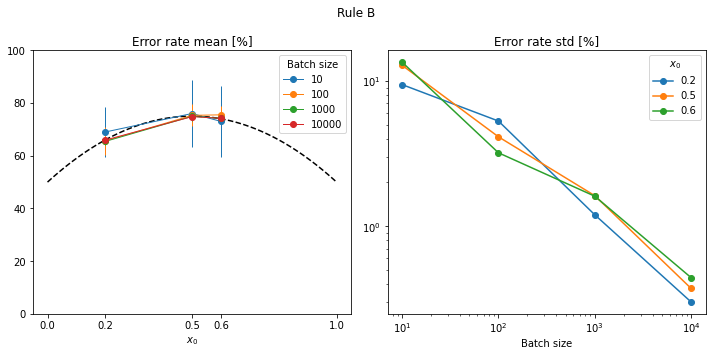

In [8]:
plot_error_rate_stats(['A', 'B'], [df_A, df_B], thresholds)

### Baseline Classifiers

In [9]:
batch_sizes = [10, 100, 1000, 10000]

classifier_C = []
classifier_D = []

for batch in batch_sizes:
    error_rates_C = error_threshold_classifier(type='C', batch=batch, n_data_sets=10)
    classifier_C.append({"Batch size": batch, 
                         "Mean": error_rates_C.mean(), 
                         "Std": error_rates_C.std()
                        })
    error_rates_D = error_threshold_classifier(type='D', batch=batch, n_data_sets=10)
    classifier_D.append({"Batch size": batch, 
                         "Mean": error_rates_D.mean(), 
                         "Std": error_rates_D.std()
                        })

In [10]:
df_C = pd.DataFrame(classifier_C)
df_C = df_C.groupby(["Batch size"]).first()
df_C

,Mean,Std
Batch size,,
10,62.00,21.35
100,52.30,5.40
1000,49.08,1.28
10000,49.92,0.48


In [11]:
df_D = pd.DataFrame(classifier_D)
df_D = df_D.groupby(["Batch size"]).first()
df_D

,Mean,Std
Batch size,,
10,47.00,11.87
100,48.50,4.39
1000,49.69,2.14
10000,50.07,0.59


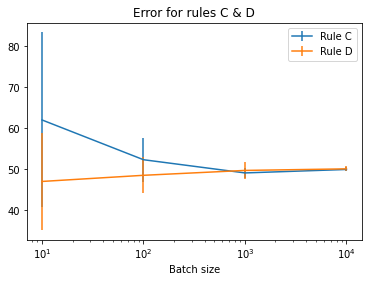

In [12]:
# Plot errors for baseline classifiers
df_C.plot(y="Mean", yerr="Std", logx=True, color="C0", ax=plt.gca(), label="Rule C")
df_D.plot(y="Mean", yerr="Std", logx=True, color="C1", ax=plt.gca(), label="Rule D")
plt.title("Error for rules C & D"); 

### Nearest Neighbor Classifier

In [13]:
size_data = 2
batch_size = 10000
ose = error_nn_classifier(size_data=size_data, batch_size=batch_size, n_data_sets=300)
print(f'Average error: {np.mean(ose):.3f}% ± {np.std(ose):.3f}%')

Average error: 34.797% ± 16.859%


In [14]:
size_data = 100
batch_size = 10000
ose = error_nn_classifier(size_data=size_data, batch_size=batch_size, n_data_sets=300)
print(f'Average error: {np.mean(ose):.3f}% ± {np.std(ose):.3f}%')

Average error: 33.606% ± 2.252%
